In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import uncertainties as u
from uncertainties import unumpy

from scipy.stats import linregress

## my thinking is that if we plot F vs Gradient B $\mu$ will bw the slope of that graph

$$F = \mu\frac{dB}{dR_y}$$
Looks good units checkout! 


## Let me know if you follow



## First, routine to unpack and plot uncertanties package

In [3]:
# We need to make a function to parse the uncertinty array and return a matplotlib plot:
def unpack_uFloat_array(xuarray, yuarray):
    # empty lists to condtain the data
    xData = []
    xError = []
    yData = []
    yError = []
    
    # step theough the array and unpack the values
    for i in xuarray:
        xData.append(i.n) # in the uncertinty package "n" takes the value of a ufloat
        xError.append(i.s) # and "s" is the uncertinty
    
    # do the same for the y array
    for i in yuarray:
        yData.append(i.n)
        yError.append(i.s)
        
    return(xData, yData, xError, yError)
    
def uFloat_errorbarr_plot(xuarray, yuarray, marker='.'):
    
    xData, yData, xError, yError = unpack_uFloat_array(xuarray, yuarray)
        
    # return a matplotlib figure.
    return(plt.errorbar(xData, yData, xerr=xError, yerr=yError, fmt = marker))

LinregressResult(slope=0.39145115601879349, intercept=-0.00025842316030161988, rvalue=0.99571005254839284, pvalue=2.309856235186893e-06, stderr=0.01626800865292229)


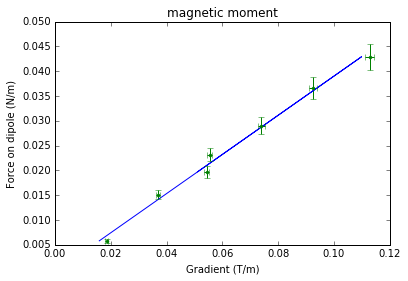

In [4]:
Qdata = np.genfromtxt('RawQuadForce.txt', delimiter="\t") # each row has form: [current, deflection of the spring].
#All the variables
I = unumpy.uarray(Qdata[:,0], .01) # current 
x = unumpy.uarray(Qdata[:,1], .0005) # displacemnt of the spring
#print(x)

k = u.ufloat(1.16, 0.07) # spring constant measured experementaly
x= x*0.001 # set the x array to be in meters 
#print(x)
mu = 4*np.pi*1e-7
N = 168
R = u.ufloat(.07, 0.0005)
R_y = u.ufloat(.035, 0.0005)
F = x*(k)
#print(F)

#Calculate the gradient at the center of a quadrapole field for a given I
DPGrad= []#T/m
for i in range(len(I)):
    DPGrad.append((abs(3*(mu*N*I[i]*R**2*R_y))/((R_y**2 + R**2)**(5/2))))

#unpack Force and Gradient B data
Fdata, DPGradData, Ferror, DPGradError = unpack_uFloat_array(F,DPGrad)

# get the best fit line of Force vs Gradient B. This should be the magnetic moment (mu) in Am^
moment = []
m, b, rsq, pval, standarderror = linregress(Fdata,DPGradData)
print(linregress(DPGradData, Fdata))
for i in Fdata:
    moment.append(m*i+b)
    
#plot the data
plt.plot(moment, Fdata)
uFloat_errorbarr_plot(DPGrad, F) 
plt.title('magnetic moment')
plt.xlabel('Gradient (T/m)')
plt.ylabel('Force on dipole (N/m)')
plt.show()



The slope above 1.26636 is close to our calculated magnetic moment shown below just one order of magnitude off

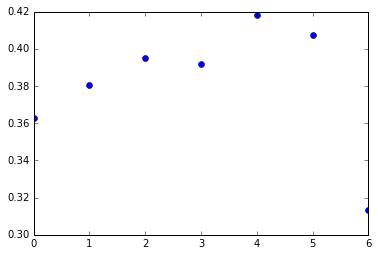

[0.36261877263627273, 0.3803825466477699, 0.39508381804523773, 0.39194823218773583, 0.41807811433358494, 0.4076261614752453, 0.3135585857501887]


0.3813280330108622

In [5]:
# calculate the magnetic moment using mu = F/(gradient B)
mm= []#Am^2
for i in range(len(F)):
    #mm.append(abs(F[(i)]/((-75.0*np.sqrt(5)*mu*N*I[i])/(64*R**2))).n)
    mm.append(abs(F[(i)]/((-48*mu*N*I[i])/(25*np.sqrt(5)*R**2))).n) # i recalculated this from the expression above, but im not 
    # sure if this is for only one coil and not two? answer: This is for two coils 


plt.plot(mm, 'o')
plt.show()
print (mm)
sum(mm)/len(mm) #Dipole moment!!!!!!!!


The order of magnitude throws me off. I cant see where the mistake would be, if there is one.
Do you think it would be worth including this graph to show how we expermentaly got $\mu$? that is assuming the slope is actualy $\mu$


So I think our gradent function was wrong but I went through it with paul and it seems that we've got the correct one now.
and good news the results agree! (which makes sense because we used the same data with two different analisis meathods RSQ vs a plain old average value.

[0.00025315437094137956+/-3.0928964598191385e-06, 0.00018894165045414652+/-3.318603579511878e-06, 0.0001208337475473766+/-3.480872045141191e-06, 5.0182341981862264e-05+/-3.5719161889757925e-06, -2.1537451090613614e-05+/-3.587267894374749e-06, -9.279784036926475e-05+/-3.5261667631876166e-06, -0.00016209374478227622+/-3.391627301874603e-06, -0.0002280161782953499+/-3.190173906635163e-06, -0.0002893172782857098+/-2.931279794769614e-06, -0.00034496174748762493+/-2.6265843831460282e-06]


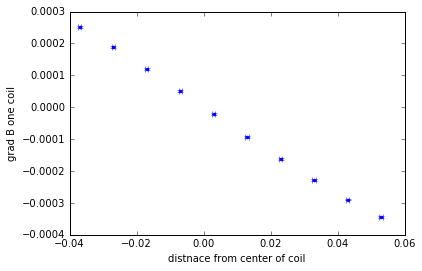

In [7]:
# Now we want to grab the one coil gradent data and compare that with the theoretical gradeent for one coil
singleCoilData = np.genfromtxt('singleCoilGradentVsYPosition.txt', delimiter=', ', skip_header=True)
#print('raw data: \n', singleCoilData) # [position_before_field_turn_off, offset_after_field_turn_off]

yPosition = unumpy.uarray(singleCoilData[:,0] ,0.5)
yOffset = singleCoilData[:,1]

# change both data columns from millimeters to meters.
yPosition *= 0.001
yOffset *= 0.001

#offset the position so 0 is in the center of the coil
#yOffset += 

#change the offsets to force on the dipole
forceOnDipole = -k*yPosition
#change force on dipole to the gradent of B by dividinng by the dipole moment
m= 0.39145
experemental_B_grad = forceOnDipole / m

# not model the experemental data:

R_z = .07
grB = []
for i in yPosition:
    grB.append( ((-3*mu*168*3*R_z**2*(i))/(i**2+R_z)**(5/2)) )



plt.xlabel('distnace from center of coil')
plt.ylabel('grad B one coil')
#nuFloat_errorbarr_plot(yPosition, experemental_B_grad)
uFloat_errorbarr_plot(yPosition, grB)
print(grB)
plt.show()